##### Suponha que você trabalha em uma empresa de produtos de beleza populares e, com a pandemia, você suspeita que o perfil de seus clientes mudou. O time de marketing, pediu a sua ajuda e gostaria de entender se 1. isso de fato aconteceu e 2. quais as diferenças do novo perfil de clientes para o antigo, pois assim poderiam personalizar melhor os seus anúncios. Para isso, eles te enviaram a base de dados (desafio_01_consumidor.csv). Como você poderia ajudá-los?

##### A base de dados: desafio_01_consumidor.csv contém informações de seus clientes (anonimizados) no período pré e pós pandemia. A coluna "pré-pandemia" indica se o dado é pré-pandemia ou não, sendo 1, caso positivo ou 0 caso negativo.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("desafio01consumidor-230829-103627.csv")
df

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1
...,...,...,...,...,...,...
198,XXXXXXX25,46,16918,desodorante,Sul,0
199,XXXXXXX50,43,10930,antissinais,Norte,0
200,XXXXXXX65,48,10246,perfume,Nordeste,0
201,XXXXXXX61,47,12337,batom,Sudeste,0


In [4]:
df.rename(columns={'pre-pandemia':'pre_pandemia',  'regiao-BR':'regiao_BR'}, inplace=True)
df

,id_cliente,idade,renda,produto,regiao_BR,pre_pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1
...,...,...,...,...,...,...
198,XXXXXXX25,46,16918,desodorante,Sul,0
199,XXXXXXX50,43,10930,antissinais,Norte,0
200,XXXXXXX65,48,10246,perfume,Nordeste,0
201,XXXXXXX61,47,12337,batom,Sudeste,0


In [5]:
clientes = df['pre_pandemia'].value_counts()
clientes

pre_pandemia
0    102
1    101
Name: count, dtype: int64

In [6]:
## observa-se que o número de clientes pré e pós pandemia é praticamente igual, tendo apenas 1 mais para o pós pandemia.

In [7]:
idade = df.groupby(['pre_pandemia'])['idade'].mean()
idade

pre_pandemia
0    44.901961
1    39.881188
Name: idade, dtype: float64

In [ ]:
## observa-se que a média de idade dos clientes pós pandemia é mais alta

In [8]:
renda = df.groupby(['pre_pandemia'])['renda'].mean()
renda

pre_pandemia
0    13968.500000
1     9180.643564
Name: renda, dtype: float64

In [ ]:
## observa-se que a média da renda dos clientes pós pandemia é maior

<Axes: title={'center': 'Comparação da renda dos clientes Pré e Pós pandemia'}, xlabel='cliente', ylabel='Renda'>

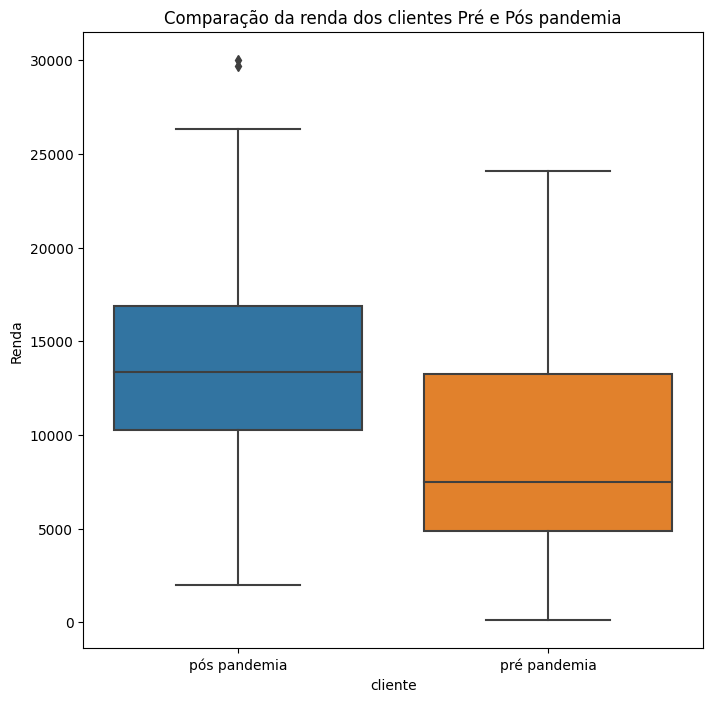

In [10]:
ax = sns.boxplot(data=df, x='pre_pandemia', y='renda')
ax.figure.set_size_inches(8, 8)
ax.set_title('Comparação da renda dos clientes Pré e Pós pandemia')
ax.set_xlabel('cliente')
ax.set_ylabel('Renda')
ax.set_xticklabels(['pós pandemia', 'pré pandemia'])

ax

In [ ]:
## a média da renda dos clientes pós pandemia é maior
## seus dados são simétricos
## já com relação aos clientes pré pandemia, oberva-se dados assimétricos

<Axes: title={'center': 'Comparação das idades dos clientes Pré e Pós pandemia'}, xlabel='cliente', ylabel='Idade'>

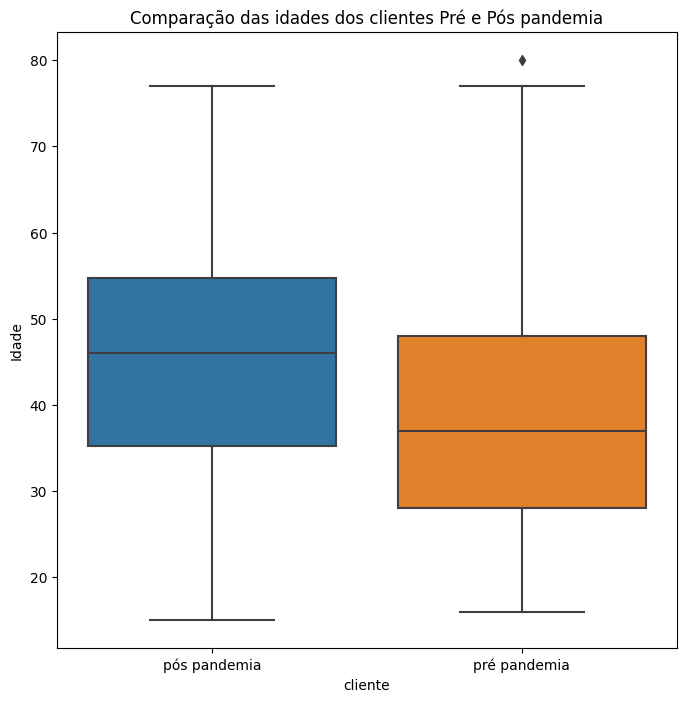

In [11]:
ax = sns.boxplot(data=df, x='pre_pandemia', y='idade')
ax.figure.set_size_inches(8, 8)
ax.set_title('Comparação das idades dos clientes Pré e Pós pandemia')
ax.set_xlabel('cliente')
ax.set_ylabel('Idade')
ax.set_xticklabels(['pós pandemia', 'pré pandemia'])

ax

In [12]:
analise1 = pd.DataFrame({'Idade': idade, 'Renda': renda})
analise1.rename(index={0:'Pós Pandemia', 1:'Pré Pandemia'}, inplace=True)
analise1.rename_axis('Cliente', axis='columns', inplace=True)
analise1

Cliente,Idade,Renda
pre_pandemia,,
Pós Pandemia,44.901961,13968.500000
Pré Pandemia,39.881188,9180.643564


In [ ]:
## os clientes pós pandemia possuem uma idade média mais elevada, bem como sua renda; comparadas aos clientes pré pandemia

In [13]:
sorted(df['produto'].unique())

['antissinais', 'base', 'batom', 'desodorante', 'perfume', 'sombra']

In [14]:
sorted(df['pre_pandemia'].unique())

[0, 1]

In [15]:
sorted(df['regiao_BR'].unique())

['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']

In [16]:
sexo = ({0:'Pós Pandemia', 1:'Pré Pandemia'})
produtos = ({0:'antissinais', 1:'base', 2:'batom', 3:'desodorante', 4:'perfume', 5:'sombra'})
regiao = ({0:'Centro-Oeste', 1:'Nordeste', 2:'Norte', 3:'Sudeste', 4:'Sul'})

In [17]:
analise_produtos = pd.crosstab(df.pre_pandemia,  df.produto)
analise_produtos.rename(index = sexo, inplace = True)
analise_produtos.rename(columns = produtos, inplace = True)
analise_produtos

produto,antissinais,base,batom,desodorante,perfume,sombra
pre_pandemia,,,,,,
Pós Pandemia,20,4,15,46,8,9
Pré Pandemia,9,3,61,20,4,4


In [ ]:
## Observa-se uma queda significativa na venda de batom.
## Os demais produtos tiveram aumento de vendas pós pandemia,
## sendo os maiores aumentos nos produtos antissinais e desodorante

In [ ]:
## O aumento de produtos antisinais pode se dar devido ao aumento de clientes mais velhos, conforme observamos na comparação das médias de idade

In [18]:
analise_regiao = pd.crosstab(df.pre_pandemia, df.regiao_BR)
analise_regiao.rename(index=sexo, inplace=True)
analise_regiao.rename(columns=regiao, inplace=True)
analise_regiao

regiao_BR,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
pre_pandemia,,,,,
Pós Pandemia,8,25,9,18,42
Pré Pandemia,17,26,8,21,29


In [ ]:
## Observa-se que teve uma queda grande no numero de clientes da regiao Centro Oeste
## e uma queda pequena no numero de clientes da região Sudeste
## Aumentou o numero de clientes da regiao Sul
## Região Norte e Nordeste praticamente mantiveram-se iguais